In [1]:
import numpy as np
vector = np.array([1,2,3,4,5])
row_vector = vector.reshape((5,1))
column_vector = vector.reshape((1,5))
single_feature_matrix = vector.reshape((1,5))

In [2]:
row_vector

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [3]:
column_vector

array([[1, 2, 3, 4, 5]])

In [4]:
single_feature_matrix

array([[1, 2, 3, 4, 5]])

In [5]:
multiple_feature_matrix = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])

In [6]:
multiple_feature_matrix

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [7]:
all_zeros = np.zeros((5,3))

In [8]:
all_zeros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [9]:
all_ones = np.ones((5,3))

In [10]:
all_ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
y = np.array([1,2,3,4,5]).reshape((5,1))

Load Datasets for Regression

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston()
california = fetch_california_housing()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [14]:
%matplotlib inline

In [15]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
dataset['target'] = boston.target
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math


In [18]:
mean_expected_value = dataset['target'].mean()

In [19]:
np.mean(dataset['target'])

22.532806324110677

In [20]:
mean_expected_value

22.532806324110677

In [21]:
Squared_errors = pd.Series(mean_expected_value - dataset['target'])**2

In [22]:
SSE = np.sum(Squared_errors)

In [23]:
print ('Sum of Squared Errors (SSE): %01.f' % SSE)

Sum of Squared Errors (SSE): 42716


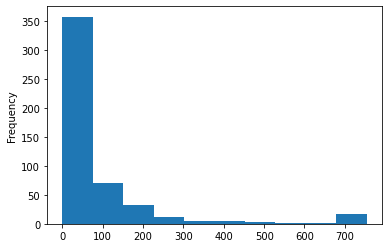

In [24]:
density_plot = Squared_errors.plot(kind='hist')

In [25]:
def standardize(x):
           return (x-np.mean(x))/np.std(x)

In [26]:
def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * \
      (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1,var2,bias=0):
    return covariance(standardize(var1), standardize(var2),bias)

from scipy.stats.stats import pearsonr
print ('Our correlation estimation: %0.5f' % (correlation(dataset['RM'], dataset['target'])))
print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0])

Our correlation estimation: 0.69536
Correlation from Scipy pearsonr estimation: 0.69536


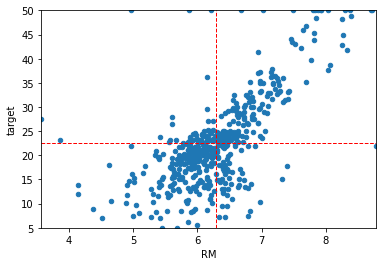

In [27]:
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),  dataset['target'].mean()], '--' , color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)

Regressing with Statsmodels

In [28]:
!pip install statsmodels

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [30]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

In [31]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [33]:
linear_regression = sm.OLS(y,X)

In [34]:
fitted_model = linear_regression.fit()

In [35]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.49e-74
Time:                        20:24:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print (fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


In [37]:
RM = 5
Xp = np.array([1,RM])
print ("Our model predicts if RM = %01.f the answer value is %0.1f" % (RM, fitted_model.predict(Xp)))


Our model predicts if RM = 5 the answer value is 10.8


In [38]:
predictions_by_dot_product = np.dot(X,betas)
print ("Using the prediction method: %s" % fitted_values[:10])
print ("Using betas and a dot product: %s" % predictions_by_dot_product[:10])

Using the prediction method: 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64
Using betas and a dot product: [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


Regressing with Scikit-learn

In [39]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [40]:
from sklearn import linear_model

In [41]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)

In [42]:
observations = len(dataset)
observations

506

In [43]:
X = dataset['RM'].values.reshape((observations,1)) 
# X should be always a matrix, never a vector
y = dataset['target'].values # y can be a vector

In [44]:
linear_regression.fit(X,y)

LinearRegression()

In [45]:
print (linear_regression.coef_)

[9.10210898]


In [46]:
print (linear_regression.intercept_)

-34.67062077643857


In [47]:
print (linear_regression.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [48]:
predictions_list = linear_regression.predict(X)[:10]
predictions_list

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155])

California Dataset

In [49]:
cali_dataset = pd.DataFrame(california.data, columns=california.feature_names)
cali_dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [50]:
cali_dataset.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [51]:
cali_dataset['target'] = california.target
cali_dataset.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [52]:
cali_observations = len(cali_dataset)
cali_observations

20640

In [53]:
C_X = cali_dataset['MedInc'].values.reshape((cali_observations,1)) 
# X should be always a matrix, never a vector
C_y = cali_dataset['target'].values # y can be a vector

In [54]:
linear_regression.fit(C_X,C_y)

LinearRegression()

In [55]:
print (linear_regression.coef_)

[0.41793849]


In [56]:
print (linear_regression.intercept_)

0.45085576703267893


In [57]:
print (linear_regression.predict(C_X)[:10])

[3.9302773  3.92033036 3.48400258 2.80932447 2.0583308  2.13798987
 1.9801345  1.75482386 1.32033501 1.99355033]


Multiple Regression Model

In [58]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [62]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:,:-1]
y = dataset['target'].values

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

prepare a suitable input matrix, naming it Xc after having it incremented by an extra column containing the bias vector (a constant variable having the unit value)

In [65]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()

In [66]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        20:38:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
X = dataset.iloc[:,:-1]
correlation_matrix = X.corr()
print (correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

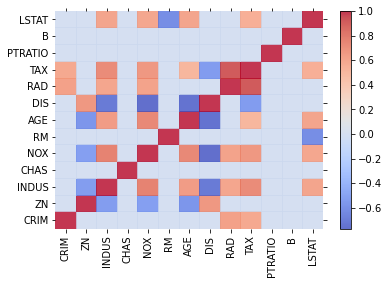

In [69]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)